In [1]:
# Outside imports
import os
import importlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
os.chdir('../')

In [8]:
import data_util.config
importlib.reload(data_util.config)
from data_util.config import *

In [9]:
!pwd

/Users/rowancassius/Desktop/capstone/LSTM_Summarizer


In [11]:
log_root

'/Users/rowancassius/Desktop/capstone/LSTM_Summarizer'

In [13]:
result_path = os.path.join(log_root, results_path)

In [20]:
df = pd.read_csv(os.path.join(result_path, 'test_results_loss_2_all.csv'), sep = '\t')

In [22]:
pd.set_option('display.max_colwidth', -1)

### Word Counts

In [91]:
count_tokens = lambda x: len(x.split())
df['SumWC'] = df['Summary'].map(count_tokens)
df['TaskWC'] = df['TaskSentence'].map(count_tokens)
df['Context'] = df['Context'].astypepe(str)
df['ContextWC'] = df['Context'].map(count_tokens)
df['DecWC'] = df['decoded'].map(count_tokens)

In [47]:
df.shape

(1190, 13)

In [49]:
df[['Context', 'TaskSentence', 'ref', 'decoded']].sample(10)

,Context,TaskSentence,ref,decoded
813,NaN,"Will you please do it, Colin?",do it,"do , Colin"
1093,Have all records of repairs and maintanence. Truck has been extremely reliable with the only problem being the A C which I had fixed and converted to R134 in Late August of this year. Blue Book - 6950 Asking - 6199,Please Call x3-3838 or 281-8588-543 for details.,call x3-3838 or 281-8588-543 for details,call SENDER
596,"Per our verbal conversation earlier today, Enron North America Corp. would be interested in selling gas under the following terms:. Volume: 400,000MMBtu during the month of August, 2000 and 800,000MMBtu during the first 10 days of September, 2000 Price: Fixed price as agreed by both parties at time of request by Duke for a firm price equal to the September NYMEX .01 Delivery Point: as agreed by both parties",Please call with questions and concerns.,call SENDER,call SENDER
664,"Needless to say, this deal is very important for both us and them. This will be the first deal where two corporates will be doing a bankruptcy swap instead of default swap on cash settlement instead of physical delivery. The only thing that is stopping us from doing this deal is the documents.",Please ask Paul Simon to expedite the matter and get us the documents tomorrow so we can shoot them to Koch for their review.,ask Paul Simon to get SENDER documents tomorrow,ask Paul Simon to expedite the documents
984,"Gerald,",Please use the following address for Lewis Energy instead:,use different address for Lewis Energy,use address for Lewis Energy
868,Kate I believe you can help us on all of these if you note any that I need to get with someone else on please let me know right away. Tomorrow is the 3rd workday and we need to make our journal entries booking inter-co at the end of the day. Thanks for all your help.,"Brooklyn, please look this file over and let me know right away if there is anything I missed or need to add.",review file and comment,look file
715,I just did a request to get Angela Davis in the Houston Office and Linda Sietzema and Sharon Crawford in the Calgary offices edit access to the Financial Trading Agreement Database. I also requested that Marcus Nettelton get edit access to the ENA Legal Online Trading Database.,I'm not sure if I did the erequest all ok. Can you check to make sure your got all four?,ensure you received all four erequests,check to SENDER
449,"The Agreement deletes references to specific performance guarantees for combined cycle plants. The Agreement now has the exhibits rolled in. To complete the agreement, we need to include the date of execution, the addresses and contacts for Sections 25.1 and 25.3, and Exhibit H-2. Let me know if you would like me to email a copy of this directly to Lee Johnson and Kent Shoemaker.",Please call when you have the opportunity to discuss the form agreement you asked me to create.,call SENDER,call SENDER
457,"Please respond to kevinscott Jeff and Steve As you requested, I have prepared a list of my preferred public policy contacts for California. It is composed of professionals from an array of public, private and non-profit backgrounds. I have worked in some capacity with each of these people and most I know quite well.",Please call me for further background.,call SENDER,call SENDER
559,"1 Would a gas compression service deal be required to be filed by the FERC? My sence is that the answer is no. This is simply an O&M service contract and lease agreement. 2 If a Pipeline is on an annual gas tracker, what would be the tracker implication? It should be flat, as technically, ECS has not changed the amount of fuel collected/utilized..we have only provided optionality as to hedgeing?? ?",Please give me a call to discuss.,call SENDER,call SENDER


In [25]:
from rouge import Rouge

In [27]:
scores = Rouge().get_scores(df['decoded'], df['ref'], avg = True)

In [29]:
Rouge().get_scores('respond to Rogelio', 'respond to Rogelio L', avg = True) 

{'rouge-1': {'f': 0.8571428522448981, 'p': 1.0, 'r': 0.75},
 'rouge-2': {'f': 0.7999999952000001, 'p': 1.0, 'r': 0.6666666666666666},
 'rouge-l': {'f': 0.8571428522448981, 'p': 1.0, 'r': 0.75}}

In [72]:
scores

{'rouge-1': {'f': 0.7689973269397016,
  'p': 0.8338402027477654,
  'r': 0.7482892104462785},
 'rouge-2': {'f': 0.653473154944531,
  'p': 0.7011744697879159,
  'r': 0.6413824900589621},
 'rouge-l': {'f': 0.7690318409949511,
  'p': 0.8361156280694093,
  'r': 0.7466797660377731}}

### Calculate Individual Scores

In [76]:
def score(r):
    scores = Rouge().get_scores(r.decoded, r.ref)[0]
    return [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f']]

In [77]:
scored_examples = [score(r) for r in df.itertuples()]

In [82]:
df = pd.concat([df, pd.DataFrame(scored_examples, columns=['Rouge-1', 'Rouge-2', 'Rouge-L'])], axis=1)

In [84]:
df.head()

,ref,decoded,#,Task,Context,TaskSentence,Summary,Labeler,NoRequestInContext,Urgent,NotRequest,Unsure/Discuss,RandomNumber,Rouge-1,Rouge-2,Rouge-L
0,review details,review details,737,"individual and volume licensing incentives, please review the details","For the rest of us, there's TheLaw.net. --NO RISK 30 DAY MONEY BACK GUARANTEE Your no risk Personal, Convenience or Workgroup Edition includes an unconditional 30 day money-back guarantee. Five attorneys in a firm or workgroup, for example, get unlimited use for an entire year for just 995; individual users for just 295. You'll be up and running in minutes and we can deliver your software today!","For more information about TheLaw.net Custom Browser and this month's individual and volume licensing incentives, please review the details included below the signature line, visit our web site at: http://www.thelaw.net or call toll free 1.877.4.LAWNET 1-877-4529-638 .",review details,Rowan,1.0,0.0,1.0,NaN,0.250688,1.000000,1.000000,1.000000
1,send comments from legal department to SENDER,send legal to SENDER,183,"you could please send those to my attention, I would appreciate it.","She can also be reached at her office at 610-3418-129 . Ron Lang Group CEO Trading Systems Group SunGard Data Systems v: 650-6251-411 f: 650-6251-611. Mr. Lang:. Rex Shelby asked that I try to get the confidentiality agreement executed today, if at all possible. I will be out of the office tomorrow, and would rather not pass this off to another attorney in our group if I can avoid it.","I understand that your legal department has comments to our form; if you could please send those to my attention, I would appreciate it.",send comments from legal department to SENDER,Rowan,1.0,0.0,NaN,NaN,0.371499,0.727273,0.222222,0.727273
2,update SENDER of changes,bring SENDER to date,3648,Please bring me up to date if there have been changes since the first week of,There must be something I have missed. The work order was submitted to Marketing for approvals and is in SAP but has not been released to date. The middle of February in-service date mentioned below is out of the question. I have not received word that pogo has given the go ahead for design or materials. We are doing the design email of 1-8-01 in preparation that they will want the interconnect.,Please bring me up to date if there have been changes since the first week of January and if the scope of the project has changes since the cost estimate and materials requirements were submitted in early January.,update SENDER of changes,George,1.0,NaN,NaN,NaN,0.468092,0.250000,0.000000,0.250000
3,give SENDER weather data,offer SENDER data information,4131,Could you kindly please offer me some real weather data information about,"We are not allowed to distribute this information. Please, explain that this is for academic research and that we can produce the time series for you, conditional on the permission from the publishers of Megawatts Daily. Vince Kaminski. Dear Dr. Kaminski:. I am a PhD Candidate under the supervision of Drs. Richard MacMinn and Patrick Brockett. I am now working on my dissertation which is focused on the weather derivatives and credit derivatives.",Could you kindly please offer me some real weather data information about the price peak or plummet because of the weather conditions?,give SENDER weather data,Sophie,NaN,0.0,NaN,NaN,0.885365,0.500000,0.000000,0.500000
4,determine the potential impact of retroactive deals with Mike and/or brian,get with Mike and/or Brian,5143,Pat/Daren: Can you get with Mike and/or Brian to determine the potential,"The impact is potentially that the gas is not pathed properly by counterparty or on the appropriate transport/gathering agreements, etc. If any rates are changing, then those need to be changed in our systems also. There may be other areas of changes also - I'm not attempting to list them all. Rather I just want to make people aware that retroactive deals can have impacts on the daily operations. Thanks

In [92]:
df.corr()

,#,NoRequestInContext,Urgent,NotRequest,RandomNumber,Rouge-1,Rouge-2,Rouge-L,SumWC,TaskWC,ContextWC,DecWC
#,1.000000,-0.179453,-0.012110,-0.495049,-0.097740,-0.138422,-0.136817,-0.135738,0.096890,0.075152,-0.070137,0.031739
NoRequestInContext,-0.179453,1.000000,-0.077386,0.044172,0.024459,0.127048,0.134954,0.127171,-0.131680,-0.155163,0.016393,-0.061535
Urgent,-0.012110,-0.077386,1.000000,-0.123742,-0.039900,-0.141391,-0.130307,-0.131443,0.127115,0.056953,-0.002745,0.101189
NotRequest,-0.495049,0.044172,-0.123742,1.000000,0.037837,0.442458,0.449250,0.450063,-0.468267,0.053239,0.365066,-0.302067
RandomNumber,-0.097740,0.024459,-0.039900,0.037837,1.000000,-0.064187,-0.056550,-0.064234,0.046188,0.049375,-0.100281,0.007521
Rouge-1,-0.138422,0.127048,-0.141391,0.442458,-0.064187,1.000000,0.942137,0.995655,-0.619062,-0.326506,0.077760,-0.407820
Rouge-2,-0.136817,0.134954,-0.130307,0.449250,-0.056550,0.942137,1.000000,0.942813,-0.588384,-0.296040,0.104871,-0.442775
Rouge-L,-0.135738,0.127171,-0.131443,0.450063,-0.064234,0.995655,0.942813,1.000000,-0.617091,-0.325876,0.078081,-0.399997
SumWC,0.096890,-0.131680,0.127115,-0.468267,0.046188,-0.619062,-0.588384,-0.617091,1.000000,0.389906,-0.065122,0.538910
TaskWC,0.075152,-0.155163,0.056953,0.053239,0.049375,-0.326506,-0.296040,-0.325876,0.389906,1.000000,0.095830,0.270077


In [93]:
import matplotlib.pyplot as plt

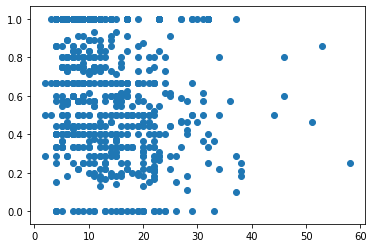

In [94]:
plt.scatter(df['TaskWC'], df['Rouge-1'])

In [101]:
df.describe()

,#,NoRequestInContext,Urgent,NotRequest,RandomNumber,Rouge-1,Rouge-2,Rouge-L,SumWC,TaskWC,ContextWC,DecWC
count,1190.000000,549.000000,1057.000000,286.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,2764.573109,0.976321,0.014191,0.590909,0.502769,0.768997,0.653473,0.769032,3.704202,11.594958,32.871429,2.765546
std,1984.522813,0.152187,0.118334,0.492528,0.274213,0.301462,0.422408,0.302710,2.706855,7.828093,27.378255,1.287707
min,4.000000,0.000000,0.000000,0.000000,0.000937,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,641.000000,1.000000,0.000000,0.000000,0.293414,0.500000,0.222222,0.500000,2.000000,6.000000,5.000000,2.000000
50%,3657.000000,1.000000,0.000000,1.000000,0.467990,1.000000,1.000000,1.000000,2.000000,9.000000,32.000000,2.000000
75%,4539.000000,1.000000,0.000000,1.000000,0.715625,1.000000,1.000000,1.000000,5.000000,16.000000,58.000000,3.000000
max,5545.000000,1.000000,1.000000,1.000000,0.997525,1.000000,1.000000,1.000000,17.000000,58.000000,75.000000,11.000000


Analyzing perfect predictions:


In [99]:
(df['Rouge-1'] > 0.95).sum()

660

In [97]:
df[df['Rouge-1'] > 0.95].shape

(660, 20)

In [105]:
df[df['Rouge-1'] > 0.95][['Context', 'TaskSentence', 'ref', 'decoded']].sample(10)

,Context,TaskSentence,ref,decoded
321,"Per our verbal conversation earlier today, Enron North America Corp. would be interested in selling gas under the following terms:. Volume: 400,000MMBtu during the month of August, 2000 and 800,000MMBtu during the first 10 days of September, 2000 Price: Fixed price as agreed by both parties at time of request by Duke for a firm price equal to the September NYMEX .01 Delivery Point: as agreed by both parties",Please call with questions and concerns.,call SENDER,call SENDER
111,"Steve, Congratulations. Welcome back. I sent you a note and a spreadsheet with the deals we have booked in our system. I was trying to reconcile them to your list of deals. I could not. But I think the best thing to do is to simply start over and book the deals you tell me to. I just need the exact terms.","I know it's your first day back and you are probably swamped, but when you get a chance, please give me a call.",call SENDER,call SENDER
116,"You will recall that Pelli would very much like to have a water piece there. Eliasson is very well respected and innovative: He's created waterfalls that flow up and wonderful minimal installation pieces that are quite beautiful. I've asked his gallery to let us know if he could meet with Pelli in Connecticut or in Houston on their next trip. Lastly, Enron has purchased the Alex Katz painting that is currently hanging in 50M.",Please call me so I can brief you on how that happened.,call SENDER,call SENDER
490,"DOMINION Advisory Group, Inc. 12330 West Avenue, Suite 204 San Antonio, Texas 78216. New on the market! Owner says To Sale ! Great hunting ranch! Other ranches in Uvalde County available and will be coming on the market next week.. We also locate ranches for clients.",Call me to discuss your interests.,call SENDER,call SENDER
950,To Place an order . . .,PLEASE CALL 973-3760-005 ask for Order Dept.www.winelibrary.com or email us at swl@winelibrary.com 1.,call 973-3760-005,call 973-3760-005
1007,nan,please print all - thanks,print all,print all
173,I am free all day except 8AM and 10AM.,Give me a call.,call SENDER,call SENDER
171,"Per our verbal conversation earlier today, Enron North America Corp. would be interested in selling gas under the following terms:. Volume: 400,000MMBtu during the month of August, 2000 and 800,000MMBtu during the first 10 days of September, 2000 Price: Fixed price as agreed by both parties at time of request by Duke for a firm price equal to the September NYMEX .01 Delivery Point: as agreed by both parties",Please call with questions and concerns.,call SENDER,call SENDER
287,"Jason, I have received your request and have forwarded it to the appropriate person.","If you you don't receive a response from them in the next couple of business days, please give me a call and I'll make sure they are working on it for you.",call SENDER,call SENDER
835,"Puget is claiming that we did a real-time deal with their trader, Lisa, on October 17 HE . The terms are 20MW purchased from Puget at a rate of 115. We cannot find anything in the Inc or Services sheet, and nothing is in EnPower. Please look in your trade books for this deal to confirm. I will get more information from Puget if I can, but so far, that's all I know. Thanks, Caroline","PS Please respond to Virginia on this, whether you did the deal or not.",respond to Virginia,respond to Virginia


## Most of the perfect summaries are 'call SENDER' summaries

Get subset of non Call messages

In [106]:
df2 = df[~(df['ref'] == 'call SENDER')]

In [110]:
df2.describe()

,#,NoRequestInContext,Urgent,NotRequest,RandomNumber,Rouge-1,Rouge-2,Rouge-L,SumWC,TaskWC,ContextWC,DecWC
count,565.000000,249.000000,482.000000,136.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,3011.224779,0.947791,0.031120,0.323529,0.515595,0.540012,0.314395,0.540085,5.589381,14.111504,28.702655,3.568142
std,2013.568361,0.222896,0.173823,0.469552,0.289064,0.276146,0.338086,0.279070,2.944142,8.311529,26.821846,1.491481
min,4.000000,0.000000,0.000000,0.000000,0.000937,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,651.000000,1.000000,0.000000,0.000000,0.271428,0.333333,0.000000,0.333333,4.000000,8.000000,1.000000,2.000000
50%,3709.000000,1.000000,0.000000,0.000000,0.520587,0.545455,0.250000,0.545455,5.000000,12.000000,21.000000,3.000000
75%,4726.000000,1.000000,0.000000,1.000000,0.777285,0.750000,0.500000,0.750000,7.000000,19.000000,57.000000,4.000000
max,5545.000000,1.000000,1.000000,1.000000,0.997525,1.000000,1.000000,1.000000,17.000000,58.000000,75.000000,11.000000


(array([36., 27., 57., 78., 81., 58., 66., 65., 30., 67.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

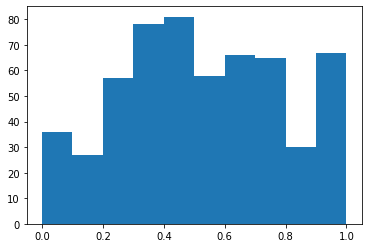

In [111]:
plt.hist(df2['Rouge-1'])

In [115]:
df2[['Context', 'TaskSentence', 'ref', 'decoded']].sample(20)

,Context,TaskSentence,ref,decoded
937,what's up froggy. we've finally slowed down over here.,give me a call today if you get a chance 713-8530-383,call SENDER at 713-8530-383,call SENDER
835,"Puget is claiming that we did a real-time deal with their trader, Lisa, on October 17 HE . The terms are 20MW purchased from Puget at a rate of 115. We cannot find anything in the Inc or Services sheet, and nothing is in EnPower. Please look in your trade books for this deal to confirm. I will get more information from Puget if I can, but so far, that's all I know. Thanks, Caroline","PS Please respond to Virginia on this, whether you did the deal or not.",respond to Virginia,respond to Virginia
958,nan,"Tim, it is all yours please communicate ASAP to Jana Jovanni in the A&A program.",communicate with Jana Jovanni,communicate to Jana Jovanni in program
1034,"And Enron made an astronomical profit during the California energy crisis last year. As a result, there are thousands of consumers who are unable to pay their basic energy bills and the largest utility in the state is bankrupt. The New York Times reported that you sold 101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.",Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded dealings.,donate this money,donate money
5,"Can we delay until then? We do have a monthly fee of 16,000 that we are receiving from Bridgeline that, while small, you could include in our revenue line to date. I am not sure why it is not showing up as income. Probably because we have been considered a cost center to date. I suspect that the income is simply being recorded as an offset to one of our cost centers.","By copy of this memo to Brian Heinrich, could you and he figure out where that income is and classify it appropriately so that it shows as revenue?",work with Brian figure out income,copy memo to Brian Heinrich
1067,"Hunter, thanks for agreeing to set up a meeting with Mark Rogers and Joseph Cheung of Petro-Canada. Mark and Jospeh will be in Houston on May 17th @ 2:30 pm and would like to meet with some members of the central desk to discuss Chicago and MidWest fundamentals.",Could you please reply by email directly to Joseph and Mark with the location of the meeting and other details.,reply to Joseph and Mark,reply by Joseph and Joseph and Mark
1124,nan,Mark: Could you please take a quick look at this too and let me know if you have any comments?,examine this and send comments to SENDER,take SENDER
890,"Ernie, Thanks for taking care of that. I will probably be getting into Austin earlier than you. I'll have my cell phone with me 281-7729-250 . If you get into town earlier, give me a call.",Otherwise why don't you just call me at the room when you get to the hotel.,call SENDER from hotel,call SENDER
1155,Kate-,"Please review.. Deal 589940.01, comment says David Porter entered.",review deal 58994001,review deal
0,"For the rest of us, there's TheLaw.net. --NO RISK 30 DAY MONEY BACK GUARANTEE Your no risk Personal, Convenience or Workgroup Edition includes an unconditional 30 day money-back guarantee. Five attorneys in a firm or workgroup, for example, get unlimited use for an entire year for just 995; individual users for just 295. You'll be up and running in minutes and we can deliver your software today!","For more information about TheLaw.net Custom Browser and this month's individual and volume licensing incentives, please review the details included below the signature line, visit our web site at: http://www.thelaw.net or call toll free 1.877.4.LAWNET 1-877-4529-638 .",review details,review details


Notes:
* maybe the model needs access to vocabulary like 'ensure' and 'turn this'
* SENDER is occasionally used incorrectly, Send this to SENDER -- instead of email
* perhaps we could use some corrective rules, "on SENDER" -> on SENDER's calendar
    * check that SENDER
    
    
In some cases the model produces a better summary than the human in terms of conciseness, indicating there are enough concise summaries for it to do well. Example.

Task: 'Rhonda: I'm pretty certain that the matrix already designates the WSPP for this CP but if it does not, please revise the matrix'

Human Summary: 'revise matrix if it does n't designate the wspp for this cp	'

Predicted Summary: 'revise matrix'

In [116]:
df2[df2['Rouge-1'] < 0.3][['Context', 'TaskSentence', 'ref', 'decoded']].sample(20)

,Context,TaskSentence,ref,decoded
1065,You are correct. The top 3 contracts were released to CES and the bottom one is released to ENA. I will execute all of them and re-release the CES's contracts to ENA. Everything looks fine with one exception. The contract at the bottom K# 61825 should have already been in ENA's name starting Nov-00 through Oct-2001.,PLEASE CONFIRM THIS .,confirm the contract should have been in ENA 's name,confirm to SENDER
940,Randy: Here is the latest version of the work-in-progress pitch book.,Please make comments and send back.,send comments on pitch book to SENDER,make comments and progress
762,nan,"Kate, can you please ask Holli if she has a copy of the following confirmation s Deal 420554.01, 420563.01 probably confirmed together .",ask Holli is she has copy of deal 42055401 and 42056301,ask Holli to SENDER
979,nan,Could you give me a brief description of what this is?,describe this for SENDER,give SENDER description
1098,"The day of your briefings will be long and exhausting, but well worth your time and effort. Your first briefings begin at 9 AM.",Please plan on meeting me at Middleberg at 8 AM to go over any last minute changes or updates.,meet SENDER at Middleberg 8 am,plan on meeting
1128,nan,"98-1534 is on the 215K for 3/2000 but is only good for 3/1 - 3/1 in Sitara, on deal #163005.",confirm extension of deal,98-1534 on deal
1181,nan,Check this sick stuff out.,look at sick stuff,check this
1029,here's todays-- Daily Blessing http://www.daily-blessings.com/bless146.htm. and yesterdays http://www.daily-blessings.com/bless145.htm. Lord's prayer http://www.daily-blessings.com/humor53.htm. I just found a really neat site that I hope you'll all check out. With the holidays coming up it has a great idea for that person you don't know what to get..but someone you think is the greatest.,It's called Unsung Hero and I know we all have one of those in our lives. check this out and see what they have to offer.,look at unsung hero,check called unsung
853,"And Enron made an astronomical profit during the California energy crisis last year. As a result, there are thousands of consumers who are unable to pay their basic energy bills and the largest utility in the state is bankrupt. The New York Times reported that you sold 101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.",Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded dealings.,donate money to funds for Americans hurt by Enron 's underhanded dealings,donate money
733,Taffy -. I've been having trouble getting this email to go through to Robin Tompkins at Portland General.,Would you please either find Robin's correct email address and forward it to her or call and get her fax number and fax it to her.,send Robin email from SENDER,find Robin 's address and forward and call
